In [1]:
import re
import pandas as pd
from pathlib import Path

In [2]:
# Укажите путь к текстовому файлу
text_file = Path("e:/cleaned_json_letter/Лесков Николай. Том 11.txt")
output_csv = "letters_processed.csv"

In [3]:
def extract_letter_info_block(text_block):
    """
    Извлекает информацию из одного блока текста письма.
    """
    # Шаблоны для извлечения частей письма
    number_pattern = r"^(\d+)\n"
    recipient_pattern = r"^\d+\n(.*?)\n"
    date_place_pattern = r"\n(\d{1,2} [а-яё]+ \d{4} г\., [А-ЯЁа-яё ]+)\.\n"
    signature_pattern = r"\n(Ваш[^\n]*)$"
    
    # Извлечение данных
    number = re.search(number_pattern, text_block)
    number = number.group(1) if number else None

    recipient = re.search(recipient_pattern, text_block)
    recipient = recipient.group(1) if recipient else None

    date_place = re.search(date_place_pattern, text_block)
    date_place = date_place.group(1) if date_place else None
    date, place = (date_place.split(", ") if date_place else (None, None))

    signature = re.search(signature_pattern, text_block)
    signature = signature.group(1) if signature else None

    # Оставшийся текст — это текст письма
    text = re.sub(rf"{number_pattern}|{recipient_pattern}|{date_place_pattern}|{signature_pattern}", "", text_block).strip()

    return {
        "number": number,
        "recipient": recipient,
        "date": date,
        "place": place,
        "text": text,
        "signature": signature,
    }

In [4]:
def process_letters_from_text_file(file_path):
    """
    Обрабатывает текстовый файл с письмами и возвращает DataFrame.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        content = f.read()

    # Разделяем текст на блоки по номерам писем
    letters = re.split(r"(?<=\n)\d+\n", content)
    letters = [f"{i+1}\n{letters[i]}" for i in range(len(letters)) if letters[i].strip()]  # Восстанавливаем номера

    # Обрабатываем каждый блок
    extracted_data = [extract_letter_info_block(letter) for letter in letters]

    return pd.DataFrame(extracted_data)






In [5]:
# Обрабатываем текстовый файл
letters_df = process_letters_from_text_file(text_file)

# Сохраняем в CSV
letters_df.to_csv(output_csv, index=False, encoding="utf-8")

# Выводим результат
print("Все письма:")
# print(letters_df)
letters_df.sample(6)

Все письма:


,number,recipient,date,place,text,signature
626,642,Января 8. Л. участвует в заседании литературно...,None,None,Января 8. Л. участвует в заседании литературно...,None
851,867,"«У одра умирающих» — «У одра умирающих, из зап...",None,None,"«У одра умирающих» — «У одра умирающих, из зап...",None
1151,1167,"Вишневский, Федор Васильевич (1838–1917) — поэ...",None,None,"Вишневский, Федор Васильевич (1838–1917) — поэ...",None
330,346,Печатается по автографу (ГПБ). Впервые опублик...,None,None,Печатается по автографу (ГПБ). Впервые опублик...,None
104,113,А. С. Суворину,11 мая 1888 г.,Петербург,А. С. СуворинуЯ Вам когда-то говорил об этюде ...,None
1254,1270,«Святочный рассказ» — «Грабеж» («Книжки «Недел...,None,None,«Святочный рассказ» — «Грабеж» («Книжки «Недел...,None


In [6]:
letters_df.text[57]

'А. С. СуворинуУважаемый Алексей Сергеевич!\nС. Н. Шубинский сказал мне, что Вам будто неприятно, что Вы мне возвратили статейку о календаре гр. Толстого, потому что я такой человек, который «обижается».\xa0— Мне очень отрадно было услыхать, что Вас озабочивает, не обидели ли Вы меня? Благодарю Вас за это доброе чувство и уверяю Вас, что я нимало Вами не обижен. Замечания Ваши верны, но не во всем. Выписки были велики, но все очень содержательны и оригинальны. То, что установляет Толстой во взгляде на солдатство и на сельское соседство,\xa0— вполне ново, умно и оригинально. Конечно, писать об этом лучше бы в «Сельском вестнике», но ведь там календарь Толстого разбирать не станут. Почему же газета общего характера не может интересоваться оригинальнейшим изменением взглядов народа о сокращенном солдатстве, о котором никто из нас и одного слова не умел проговорить в толк?\xa0— Очевидно, моя статейка попала Вам под «дурной стих» (что я видел даже по почерку письма), и Вы сорвали на ней сво

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexewd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Частотность слов:
          id       Word  Frequency
0          1        том        616
1          2          1        165
2          3  разбойник         88
3          4      ехали         33
4          5         мы       2640
...      ...        ...        ...
29681  29682   «сдается         11
29682  29683         68         11
29683  29684      гамза         11
29684  29685         69         11
29685  29686         70         11

[29686 rows x 3 columns]

Средняя длина слова: 4.720394560736656
Средняя длина предложения: 10.486037047431939

Биграммы:
            id                   Ngram  Frequency
0            1                (том, 1)         11
1            2          (1, разбойник)         11
2            3      (разбойник, ехали)         11
3            4             (ехали, мы)         11
4            5                 (мы, к)         55
...        ...                     ...        ...
105125  105126             (вдруг, 70)         11
105126  105127           (70, толпега) 

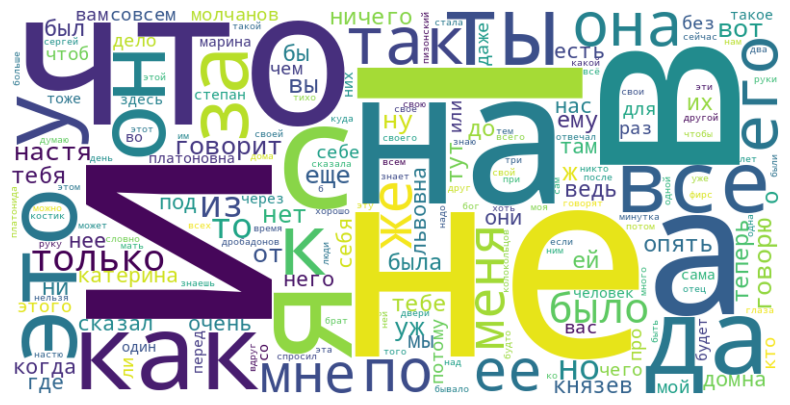

In [7]:
import os
import json
import nltk
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Загрузим дополнительные ресурсы для анализа
nltk.download('punkt')
nltk.download('stopwords')

# Функция для загрузки JSON файлов
def load_json_files(json_folder):
    texts = []
    for filename in os.listdir(json_folder):
        if filename.endswith('.json'):
            with open(os.path.join(json_folder, filename), 'r', encoding='utf-8') as file:
                data = json.load(file)
                texts.append(data.get('content', ''))
    return texts

# Функция для очистки текста
def clean_text(text):
    # Приводим к нижнему регистру и удаляем пунктуацию
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Разделяем текст на слова
    words = text.split()
    return words

# Функция для анализа частоты слов
def word_frequency_analysis(texts):
    all_words = []
    for text in texts:
        all_words.extend(clean_text(text))
    word_counts = Counter(all_words)
    return word_counts

# Функция для анализа средней длины слов и предложений
def average_lengths(texts):
    word_lengths = []
    sentence_lengths = []
    
    for text in texts:
        words = clean_text(text)
        word_lengths.extend([len(word) for word in words])
        
        # Разбиваем на предложения и считаем их длину
        sentences = nltk.sent_tokenize(text)
        sentence_lengths.extend([len(sentence.split()) for sentence in sentences])
    
    avg_word_length = sum(word_lengths) / len(word_lengths) if word_lengths else 0
    avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0
    
    return avg_word_length, avg_sentence_length

# Функция для анализа биграмм и триграмм
def ngram_analysis(texts, n=2):
    all_ngrams = []
    
    for text in texts:
        words = clean_text(text)
        ngrams_list = ngrams(words, n)
        all_ngrams.extend(ngrams_list)
    
    ngram_counts = Counter(all_ngrams)
    return ngram_counts

# Преобразуем результат частотного анализа в DataFrame
def create_frequency_dataframe(word_counts):
    df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
    df['id'] = df.index + 1
    df = df[['id', 'Word', 'Frequency']]
    return df

# Преобразуем n-граммный анализ в DataFrame
def create_ngram_dataframe(ngram_counts):
    df = pd.DataFrame(ngram_counts.items(), columns=['Ngram', 'Frequency'])
    df['id'] = df.index + 1
    df = df[['id', 'Ngram', 'Frequency']]
    return df

# Функция для генерации wordcloud
def generate_wordcloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Пример использования
json_folder = 'e:/cleaned_json'

# Загружаем тексты из JSON
texts_from_json = load_json_files(json_folder)

# Анализируем частоту слов
word_counts = word_frequency_analysis(texts_from_json)

# Анализируем среднюю длину слов и предложений
avg_word_length, avg_sentence_length = average_lengths(texts_from_json)

# Анализируем биграммы и триграммы
bigram_counts = ngram_analysis(texts_from_json, n=2)
trigram_counts = ngram_analysis(texts_from_json, n=3)

# Преобразуем результаты в DataFrame
frequency_df = create_frequency_dataframe(word_counts)
bigram_df = create_ngram_dataframe(bigram_counts)
trigram_df = create_ngram_dataframe(trigram_counts)

# Выводим результаты
print("Частотность слов:")
print(frequency_df)

print("\nСредняя длина слова:", avg_word_length)
print("Средняя длина предложения:", avg_sentence_length)

print("\nБиграммы:")
print(bigram_df)

print("\nТриграммы:")
print(trigram_df)

# Генерируем и показываем wordcloud
generate_wordcloud(word_counts)

# Если хочешь сохранить в CSV
# frequency_df.to_csv('word_frequency.csv', index=False)
# bigram_df.to_csv('bigram_frequency.csv', index=False)
# trigram_df.to_csv('trigram_frequency.csv', index=False)
